# Import packages

In [1]:
#import packages
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score,recall_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Python magic command to print many statements on the same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# Import data set 'Telco-Customer-Churn Dataset'

In [3]:
df=pd.read_csv('F:/Data/BA05_Module 3_Telco-Customer-Churn Dataset.csv',sep=',')

In [4]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
#Remove Customer id Columns 
df=df.iloc[:,1:22]

In [22]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

# Pandas profiling to get EDA Report

In [25]:
!pip install pandas-profiling
import pandas_profiling

In [26]:
eda_report=pandas_profiling.ProfileReport(df)
eda_report

AssertionError: Gaps in blk ref_locs

In [9]:
# To check if there are any null Values
pd.isnull(df).any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [10]:
print('Counts of Labels')
df.groupby("Churn").size()

Counts of Labels


Churn
No     5174
Yes    1869
dtype: int64

In [11]:
df.shape
df.columns

(7043, 20)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [13]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# To convert objects to int
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=pd.Categorical(df[col]).codes

### Cross verifying the Data again to ensure it is converted to integer (Categorical)

In [15]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


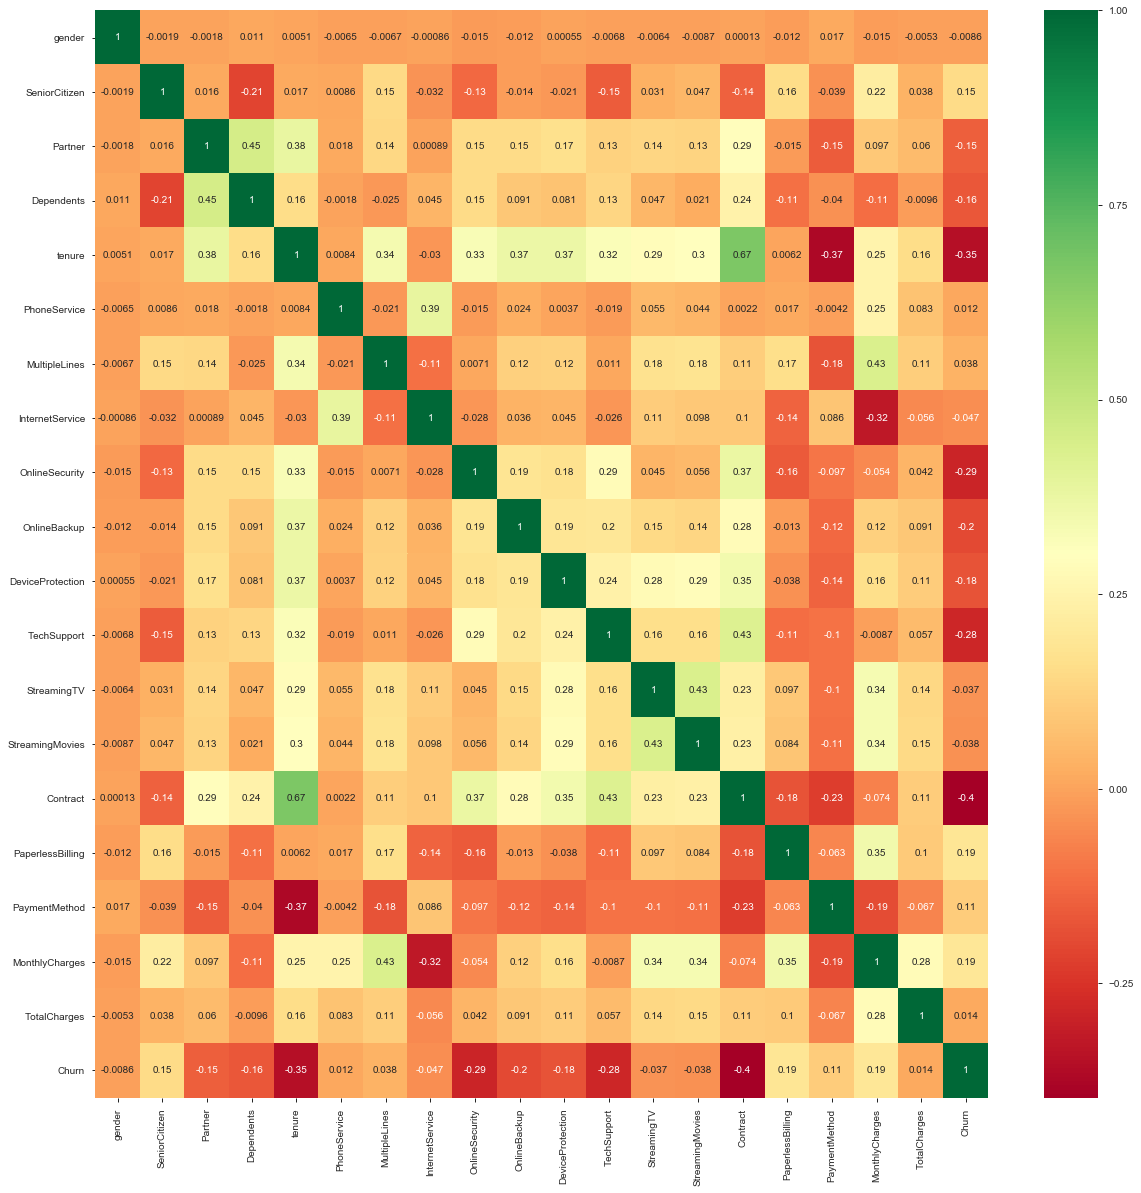

In [16]:
#Plot correlation heat map
x=df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

## From the data understood that the Response(y) is Churn and the categorised into 0 and 1

In [1]:
# convert given data into x and y variables
y=df.Churn
x=df.drop('Churn',axis=1)
y.head()

NameError: name 'df' is not defined

In [18]:
df.groupby('Churn').size()

Churn
0    5174
1    1869
dtype: int64

In [19]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(4930, 19)

(4930,)

(2113, 19)

(2113,)

In [32]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
classes =log.predict(test_x)
print(classes.size)
print('Positive cases in Test data:', test_y[test_y==1].shape[0])
print('Negative cases in Test data:', test_y[test_y==0].shape[0])

NotFittedError: This LogisticRegression instance is not fitted yet

In [27]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(train_x,train_y)

C:\Users\gauth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
log.coef_

array([[ 7.14613654e-03,  2.68734666e-01,  3.07165584e-02,
        -8.86826143e-02, -3.58507150e-02, -8.92337746e-01,
         1.11383989e-01,  2.39671881e-01, -2.50762751e-01,
        -1.14214154e-01, -1.13487758e-01, -2.61766144e-01,
        -4.57639620e-03,  3.95512481e-02, -6.41400666e-01,
         2.79768497e-01,  3.92252866e-02,  2.69617237e-02,
         5.04839066e-05]])

In [29]:
coeff=pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(log.coef_))],axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_values('Coeff',ascending=False)

,Variable,Coeff
15,PaperlessBilling,0.279768
1,SeniorCitizen,0.268735
7,InternetService,0.239672
6,MultipleLines,0.111384
13,StreamingMovies,0.039551
16,PaymentMethod,0.039225
2,Partner,0.030717
17,MonthlyCharges,0.026962
0,gender,0.007146
18,TotalCharges,0.000050


In [30]:
print ('Accuracy Score')
print (metrics.accuracy_score(test_y,classes))
print ('Precision/Recall Metrics')
print (metrics.classification_report(test_y,classes))
print ('AUC')
auc = metrics.roc_auc_score(test_y,classes)
auc

Accuracy Score


NameError: name 'classes' is not defined

In [31]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

NameError: name 'classes' is not defined

In [ ]:
print('confusion Matrix')
cf = metrics.confusion_matrix(test_y,classes)
lbl1=["Predicted 0","Predicted 1"]
lbl2 = ["True 0","True 1"]
sns.heatmap(cf,annot=True,cmap ="Greens", fmt="d", xticklabels=lbl1,yticklabels=lbl2)
plt.show()

# Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# type "conda install graphviz" in anaconda prompt before installing graphviz

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/Graphviz2.38/bin'

In [ ]:
import graphviz

### Due to some issue with graphviz module importing, generated tree.dot file and visualized in webgraphviz

In [ ]:
#import graphviz
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(x,y)
with open('tree.dot','w') as dotfile:
    tree.export_graphviz(clf,out_file=dotfile,feature_names=x.columns,filled=True)
    dotfile.close()
    
#from graphviz import Source
#with open('tree.dot','r') as f:
    #text=f.read()
    #plot=Source(text)
#plot


In [ ]:
from sklearn import tree
my_tree_one = tree.DecisionTreeClassifier(max_depth=4)
my_tree_one
my_tree_one = my_tree_one.fit(train_x, train_y)
predicted = my_tree_one.predict(test_x)

In [ ]:
metrics.accuracy_score(predicted, test_y)

In [ ]:
my_tree_one.feature_importances_
x.columns
features = pd.DataFrame(my_tree_one.feature_importances_,x.columns)
features
features.columns = ["Importance"]
features

## Decision Tree Hyperparameters optimization using cross-validation 

In [ ]:
criterion=['gini','entropy']
min_samples_split=[2,10,20,50,100]
max_depth=[20,30,None]

### import gridsearchcv

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'criterion':criterion, 'min_samples_split':min_samples_split,'max_depth':max_depth}
dt_g=GridSearchCV(my_tree_one, param_grid, cv=5,verbose = 2,n_jobs=-1)
dt_g.fit(train_x,train_y)

In [ ]:
plt.figure(figsize=(8,4))
print('Confusion Matrix')
cf = metrics.confusion_matrix(predicted, test_y)
lbl1=["P1", "P2", "P3"]
lbl2 = ["T1", "T2", "T3"]
sns.heatmap(cf,annot=True,cmap ="BrBG_r", fmt="d", xticklabels=lbl1,yticklabels=lbl2)
plt.show()

In [ ]:
dt_g.best_estimator_

In [ ]:
dt_g.best_score_

In [ ]:
dt_g.best_index_

In [ ]:
cv=pd.DataFrame(dt_g.cv_results_)
cv